# Project 6 - Featurization, Model Selection & Tuning

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## 6.1. Data loading, EDA & Visualization

In [3]:
concrete_df = pd.read_csv("concrete (1).csv")
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
concrete_df.shape

(1030, 9)

In [4]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### About the dataset:
1. Data set consists of 1030 records with 9 features, 'Strength' being the target feature. 
2. Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.
3. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

### Attribute Information:
1. Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
2. Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
3. Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable.
4. Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
5. Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
6. Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
7. Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
8. Age -- quantitative -- Day (1~365) -- Input Variable
9. Concrete compressive strength -- quantitative -- MPa(megapascals) -- Output/Target Variable

In [7]:
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There are no missing values in the dataset. By looking at the data types which are float & int, we can say that there are no invalid values either in the dataset. Presence of invalid value in any feature would resulted in the data type 'object'. Let's proceed further.

In [8]:
concrete_df[concrete_df["slag"]==0]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
12,385.0,0.0,0.0,186.0,0.0,966.0,763.0,14,27.92
17,336.0,0.0,0.0,182.0,3.0,986.0,817.0,28,44.86
18,190.7,0.0,125.4,162.1,7.8,1090.0,804.0,3,15.04
19,312.7,0.0,0.0,178.1,8.0,999.7,822.2,28,25.10
20,229.7,0.0,118.2,195.2,6.1,1028.1,757.6,3,13.36
24,331.0,0.0,0.0,192.0,0.0,1025.0,821.0,28,31.74


In [9]:
concrete_df[concrete_df["ash"]==0]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
11,173.0,116.0,0.0,192.0,0.0,946.8,856.8,3,6.94
12,385.0,0.0,0.0,186.0,0.0,966.0,763.0,14,27.92
13,237.5,237.5,0.0,228.0,0.0,932.0,594.0,7,26.26
16,237.5,237.5,0.0,228.0,0.0,932.0,594.0,28,30.08


In [10]:
concrete_df[concrete_df["superplastic"]==0]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
11,173.0,116.0,0.0,192.0,0.0,946.8,856.8,3,6.94
12,385.0,0.0,0.0,186.0,0.0,966.0,763.0,14,27.92
13,237.5,237.5,0.0,228.0,0.0,932.0,594.0,7,26.26
16,237.5,237.5,0.0,228.0,0.0,932.0,594.0,28,30.08
21,228.0,342.1,0.0,185.7,0.0,955.8,674.3,7,21.92


In all the above cases where values are 0, they comprise almost 50% of the dataset. May be these fields are not of importance deriving the comprehensive strength of the concrete.

### 6.1.1. Univariate Analysis

In [11]:
concrete_df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [12]:
concrete_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Observations:
1. There are no missing values in the data set. However, there are some '0' values in the fields 'slag', 'ash' & 'superplastic'. This is quite possible to hold '0' and concrete can still be manufactured without these.
2. Except for 'water', 'superplastic' & 'fineagg', data is positively skewed, it can be observed mean is more than median.
3. Data for 'cement', 'water', 'courseagg' & 'strength' is close to normal distribution as the mean & median are  closer.
4. Data in most of the feature indicates to have long tails as the maximum value is far more than mean. There is a possibility for outlier presence in few features.
5. Looking at 845 unique values for 'strength' which are far morethan the unique values in independent variable, the combinations likely to have less chance of linear relationship with the target variable.

In [0]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d9d6d1c50>,
      dtype=object)

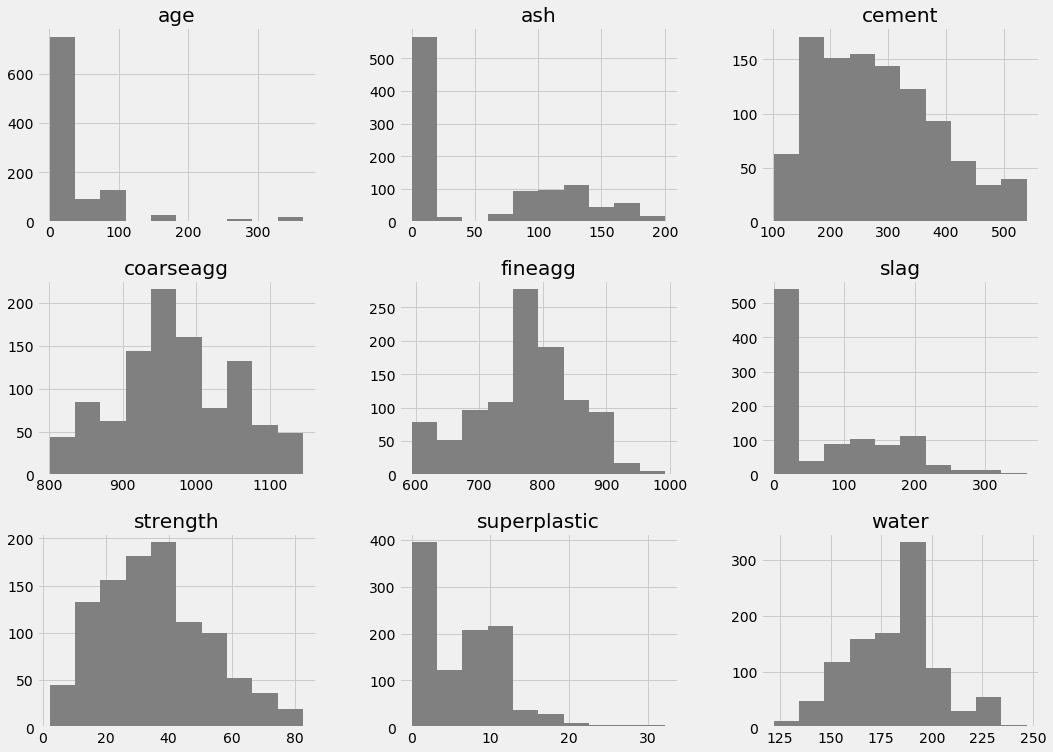

In [14]:
plt.style.use('fivethirtyeight')
concrete_df.hist(grid = 'True', color = 'grey')

cement              AxesSubplot(0.08,0.740345;0.395455x0.139655)
slag            AxesSubplot(0.554545,0.740345;0.395455x0.139655)
ash                 AxesSubplot(0.08,0.572759;0.395455x0.139655)
water           AxesSubplot(0.554545,0.572759;0.395455x0.139655)
superplastic        AxesSubplot(0.08,0.405172;0.395455x0.139655)
coarseagg       AxesSubplot(0.554545,0.405172;0.395455x0.139655)
fineagg             AxesSubplot(0.08,0.237586;0.395455x0.139655)
age             AxesSubplot(0.554545,0.237586;0.395455x0.139655)
strength                AxesSubplot(0.08,0.07;0.395455x0.139655)
dtype: object

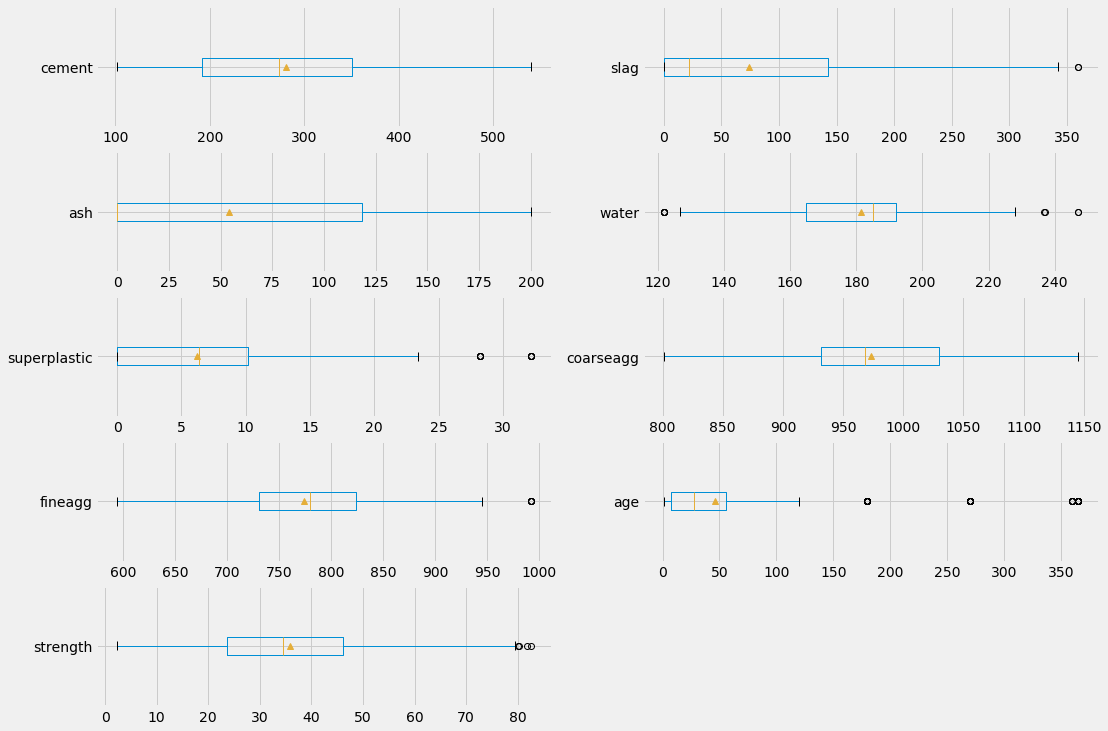

In [15]:
concrete_df.plot(kind = 'box', subplots = True, sharex = False, layout = (5,2), 
                 vert = False, grid = True, showmeans = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d9900cd68>,
      dtype=object)

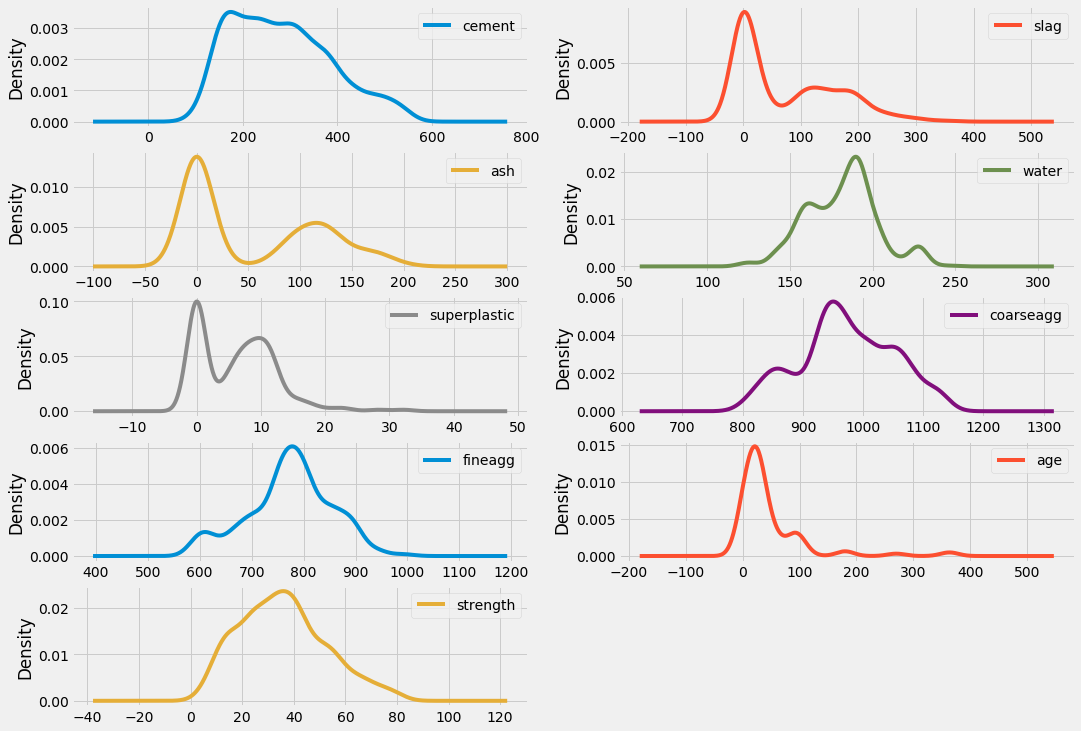

In [16]:
concrete_df.plot(kind = 'density', subplots = True, sharex = False, layout = (5,2),grid = True)

### Observations:
1. Age: Most of the data points are of the age less than 50 days. There are very few points beyond age of 100 days. Data for the age is positively skewed. Few outliers can be observed in the age.
2. Ash: There are 2 gaussians in the 'ash' represents 2 groups of data.Maximum values are of less 25. There are no values between 45 & 60. Data points are close to normal distribution & positively skewed.
3. Cement: Data is positively skewed. There are no ourliers or missing values.
4. Corseagg: Positively skewed and close to normal distribution. We can observe multiple gaussians represting data from different clusters.
5. Fineagg: Negatively skewed. There is an outlier present in the data. We can observe slight humps in the distribution which shows data is from diff clusters.
6. Slag: Positively skewed & can observe 2 gaussians. There is an outlier in slag.
7. Strength: Positively skewed and close to normal distribution. Few outliers present in the data.
8. Superplatic: Negatively skewed with few outliers. 2 gaussians can be observed which represents data from 2 groups.
9. Water: Negatively skewed with few outliers present in the data. Can observe 3 gaussians in the distribution.

#### Note: Since the outliers are not too many, we are retaining the data for all as it is. In this case, distorition is not much, don't see a need to replace the outliers either.

### 6.1.2. Bivariate & Multivariate Analysis

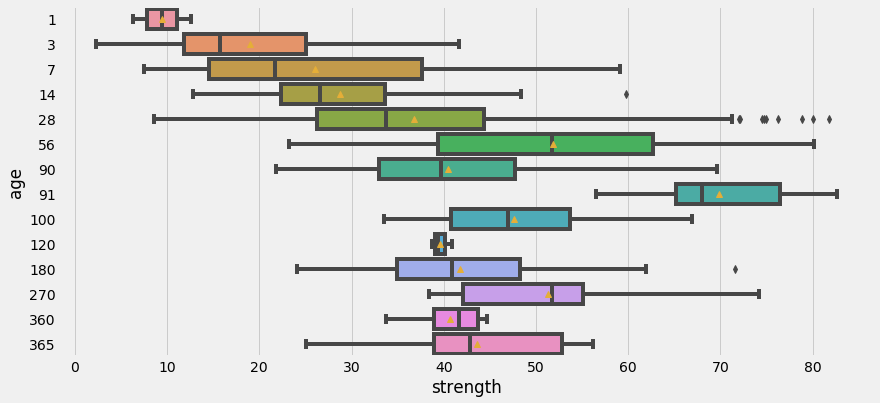

In [17]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(13,6))
plt.ylabel("Age")
plt.xlabel("Strength")
sns.boxplot(y = concrete_df['age'], x = concrete_df['strength'], orient = "h", showmeans = True)

#### Observation:
1. More data points recorded are of age 28 days. We can see some outliers for strength at the same. Data points recorded beyond 100 days are lesser.
2. Even though there are no outliers in strenght while checking the overall data, there are outliers present by age. At the age of 14, 28 & 180 days outliers can be noticed.

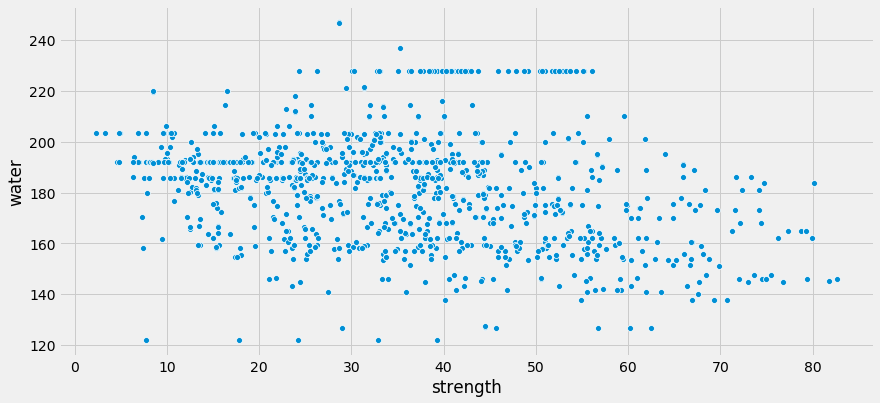

In [18]:
fig = plt.figure(figsize=(13,6))
plt.xlabel("Water")
plt.ylabel("Strength")
sns.scatterplot(y = concrete_df["water"], x = concrete_df['strength'])

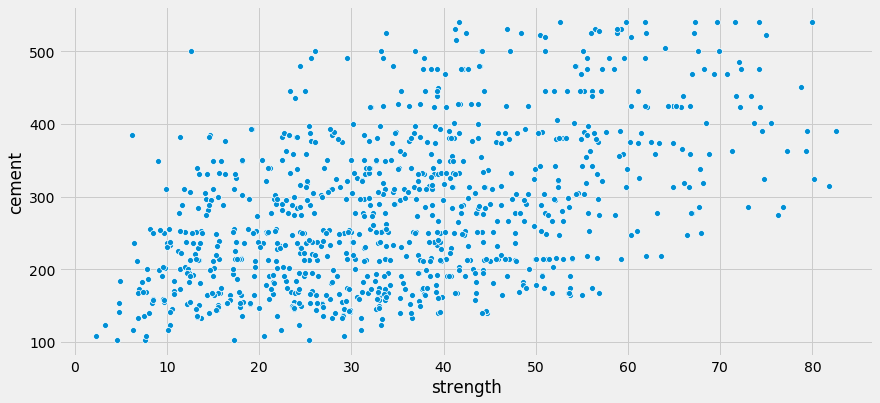

In [19]:
fig = plt.figure(figsize=(13,6))
plt.xlabel("Cement")
plt.ylabel("Strength")
sns.scatterplot(y = concrete_df["cement"], x = concrete_df['strength'])

Text(0.5, 1.0, 'Scatter plot between Water & Cement by Strength')

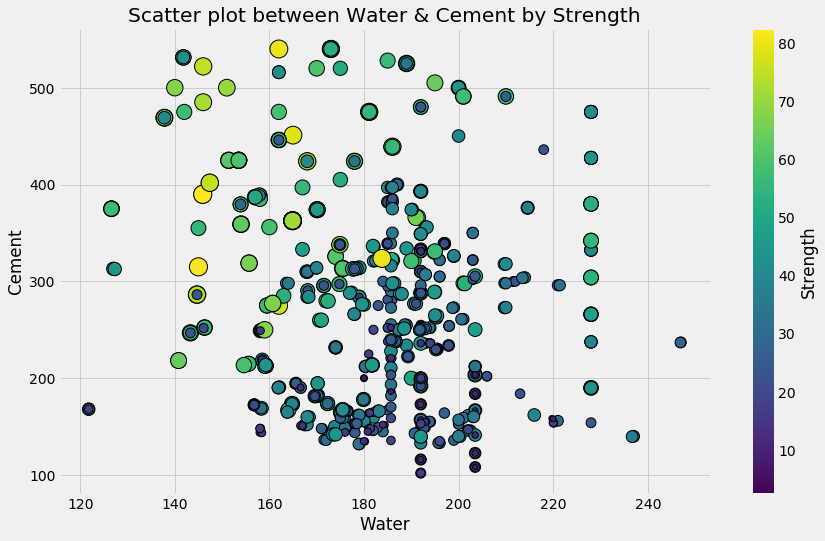

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,8))
plt.xlabel("Water")
plt.ylabel("Cement")
plt.scatter(concrete_df['water'], concrete_df['cement'], 
            c = concrete_df['strength'], s = concrete_df['strength']*4,
           cmap = 'viridis', linewidth = 1, edgecolor = 'k')
plt.colorbar().set_label("Strength")
plt.title("Scatter plot between Water & Cement by Strength")

We can observe the bigger dots when cement is more & water is less which indicates increased water content reduces the concrete strenght. The proportion of water & cement is paramount to the compressive strength.

Text(0.5, 1.0, 'Scatter plot between FineAgg & CoarseAgg by Strength')

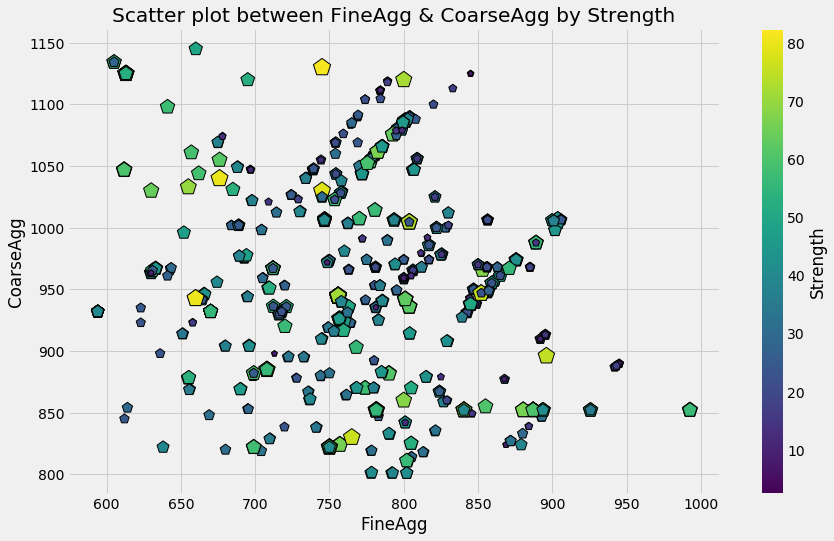

In [21]:
plt.figure(figsize=(13,8))
plt.xlabel("FineAgg")
plt.ylabel("CoarseAgg")
plt.scatter(concrete_df['fineagg'], concrete_df['coarseagg'], 
            c = concrete_df['strength'], s = concrete_df['strength']*4,
           cmap = 'viridis', linewidth = 1, edgecolor = 'k', marker = "p")
plt.colorbar().set_label("Strength")
plt.title("Scatter plot between FineAgg & CoarseAgg by Strength")

Text(0.5, 1.0, 'Scatter plot between Age & Cement by Strength')

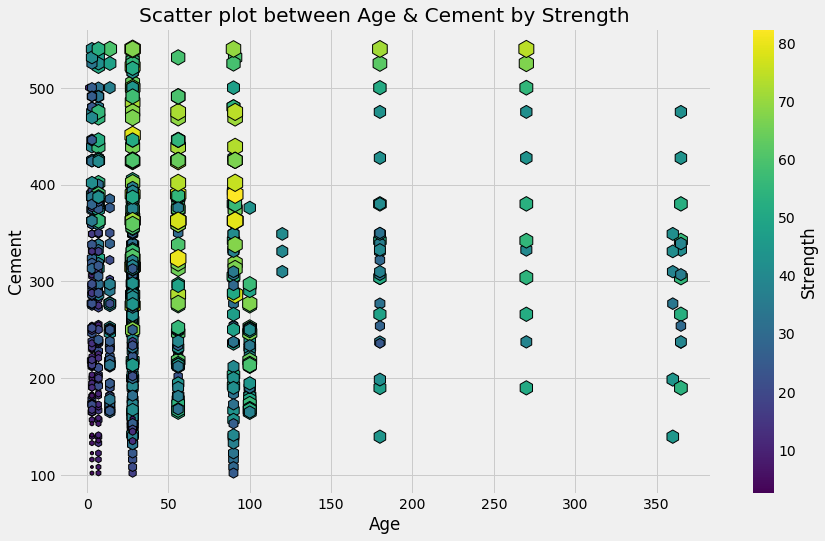

In [22]:
plt.figure(figsize=(13,8))
plt.xlabel("Age")
plt.ylabel("Cement")
plt.scatter(concrete_df['age'], concrete_df['cement'], 
            c = concrete_df['strength'], s = concrete_df['strength']*4,
           cmap = 'viridis', linewidth = 1, edgecolor = 'k', marker = "h")
plt.colorbar().set_label("Strength")
plt.title("Scatter plot between Age & Cement by Strength")

Mostly better strengths are noted at less age (between 45 & 105 days).

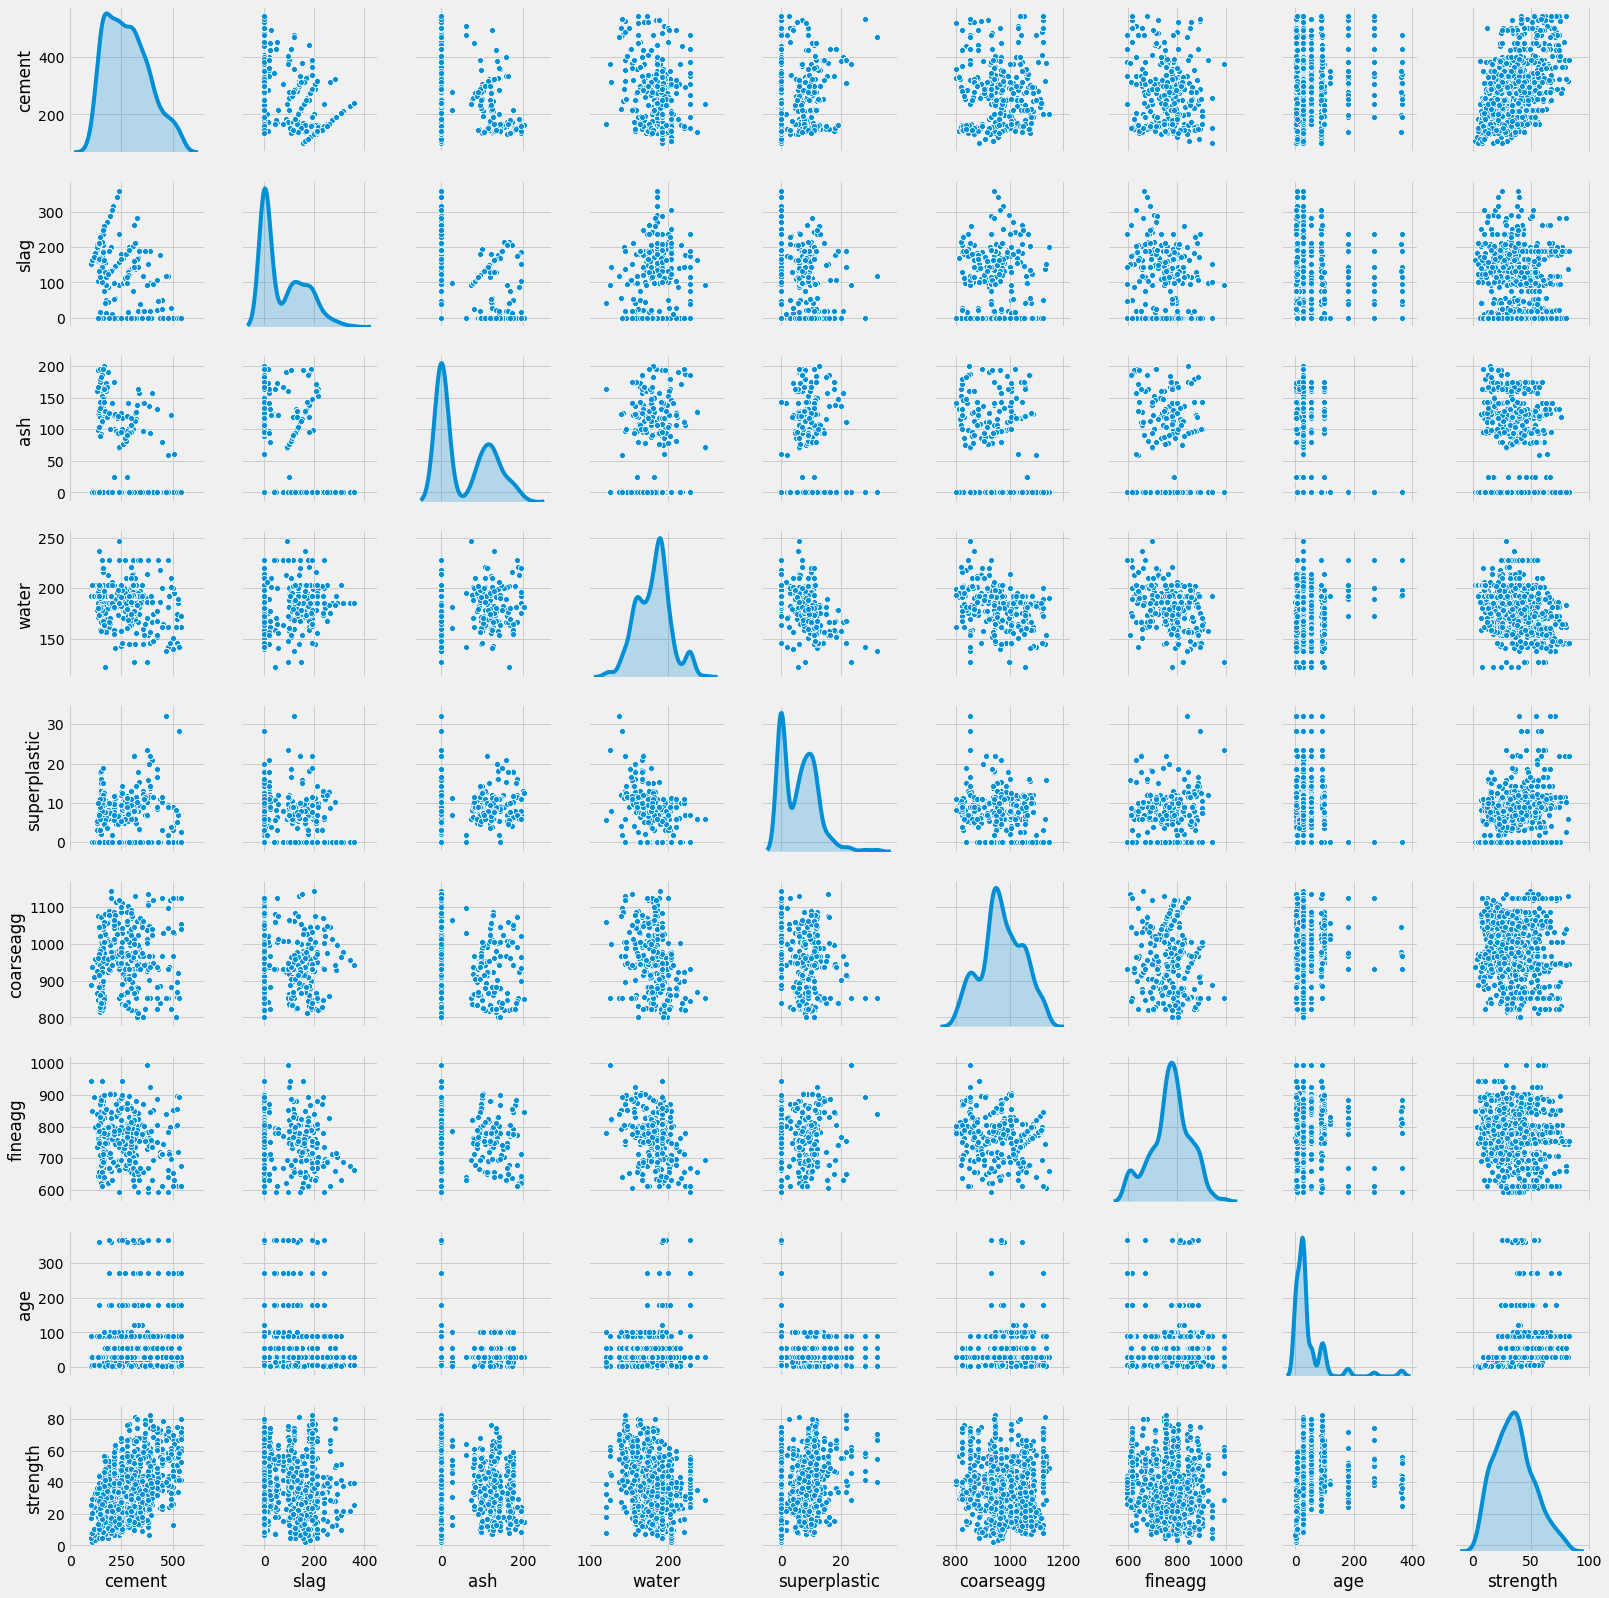

In [23]:
sns.pairplot(concrete_df, diag_kind = 'kde')

### Observation:
1. There is no concrete corelation among the independent variable and also between each independent variable and target variable ('strength').
2. Looks like data from different samples as we can see more than one hump in 7 out of 8 independent variables.
3. We can observe less data points beyond 100 days of age.

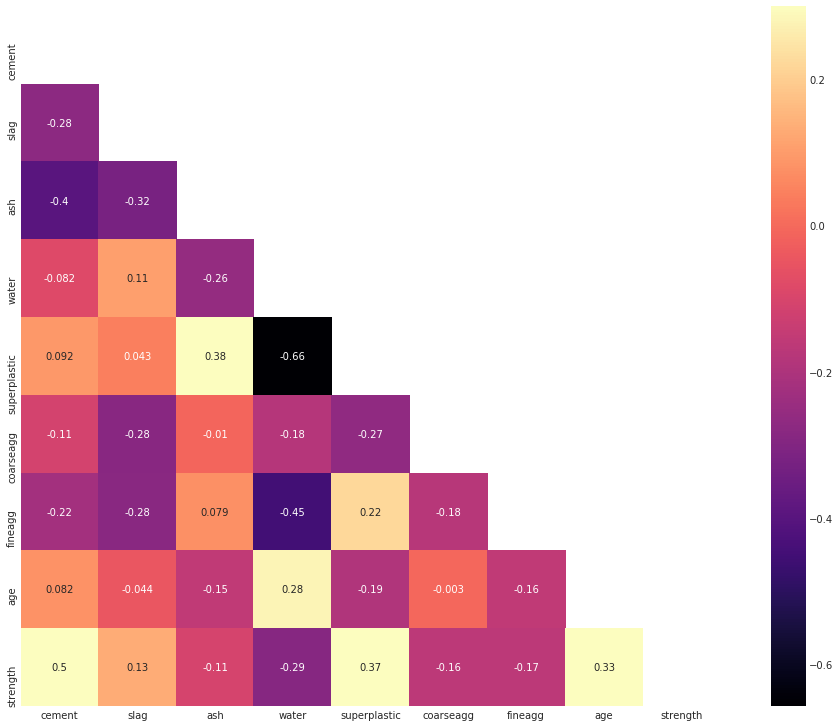

In [24]:
plt.style.use('ggplot')
corr = concrete_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot = True, cmap = 'magma')

### Observation:
1. As observerd in the pair plot, only 'cement', 'water', 'superplastic' & 'age' has notable relation with the target variable 'strength'.
2. If I consider 0.25 as cut-off:
    a. 'superplastic' is negatively corelated with 'courseagg'
    b. 'water' is positively corelated with age & negatively corelated with 'superplastic' & 'fineagg'
    c. 'ash' is positively correlated with 'superplastic'
    d. 'slag' is negatively correlated with 'fineagg', 'courseagg' & 'ash'
    e. 'cement' is negatively correlated with 'ash' & slag'
3. Even though there is a correltaion to some extent among the independent variables, we can't drop any of the features as correlation is very minimal.
4. When compared with the target variable, all the dependent features seems to be contributing to an extent. We can't drop any features as the correlation with target is closer for all the variables.

# 6.2. Featurization

## 6.2.1. Applying Simple Linear Regression, Ridge & Lasso Regression

In order to know whether featurization is needed, we should know how the data behaves in any model. To know the same, let's apply Simple Linear Model, Ridge & Lasso regression models with the default parameters and check further by regularizing the same.

In [0]:
''' Splitting the dataset into training, validation & test sets. Lets's check the scores on validation data first &
then decide if we can freeze the model for applying on test data.'''
X = concrete_df.iloc[:, 0:8]
y = concrete_df.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=52)

In [26]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
LR.score(X_val, y_val)

0.6278432920812145

In [28]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
ridge.score(X_val, y_val)

0.6278429913787169

In [30]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_val, y_val)

0.6259924680106306

In [31]:
print("Simple Linear Regression:", LR.score(X_val, y_val))
print("Ridge Regression:", ridge.score(X_val, y_val))
print("Lasso Regression:", lasso.score(X_val, y_val))

Simple Linear Regression: 0.6278432920812145
Ridge Regression: 0.6278429913787169
Lasso Regression: 0.6259924680106306


After applying the Linear, Ridge & Lasso regression, scores on validation data set is around 63% and is almost same for all the models. There is defnitely scope for improving the score and let's check if featurization will help improving the accuracy. Applying polynomial features to take the data points to a higher dimension.

## 6.2.2. Adding Polynomial Features

In [0]:
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

In [0]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [0]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_scaled, test_size=0.30, random_state=25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=52)

In [35]:
X_train.shape

(540, 37)

We can see the higher dimensional data points are added & the total features now are 37.

In [36]:
LR.fit(X_train, y_train)
print("LR Score on training data:", LR.score(X_train, y_train))
ridge.fit(X_train,y_train)
print("Ridge Score on training data:", ridge.score(X_train, y_train))
lasso.fit(X_train, y_train)
print("Lasso Score on training data:", lasso.score(X_train, y_train))

LR Score on training data: 0.7518737349614728
Ridge Score on training data: 0.7517101155117756
Lasso Score on training data: 0.0


In [37]:
print("Simple Linear Regression:", LR.score(X_val, y_val))
print("Ridge Regression:", ridge.score(X_val, y_val))
print("Lasso Regression:", lasso.score(X_val, y_val))

Simple Linear Regression: 0.7383562457935374
Ridge Regression: 0.7376975120444369
Lasso Regression: -0.008943663409424207


Scores are improved for linear regression & ridge regression. However, score for Lasso regression has gone negative. So we can eliminate Lasso from consideration. The improvement in scores is almost same for Simple Linear Regression & Ridge Regression. We can say adding higher dimensional features will help improving the model in this case. Let's check scores on test data for both linear & ridge regressions.

In [38]:
print("Simple Linear Regression:", LR.score(X_test, y_test))
print("Ridge Regression:", ridge.score(X_test, y_test))

Simple Linear Regression: 0.7492286643997024
Ridge Regression: 0.7486014993107342


We can say both the models are neither under fit nor over fit as the performace is consistent on training, validation & test data sets.

## 6.2.3. Clustering

In [39]:
# Scaling the data
new_df = concrete_df.apply(zscore)
new_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727


In [40]:
# Data points are scaled. Creating the clusters raning from 1 to 20
cluster_range = range(1,20)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 10)
    clusters.fit(new_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,9270.000000
1,2,7586.181995
2,3,6368.781536
3,4,5534.847256
4,5,4812.629466
5,6,4352.170216
6,7,4040.950642
7,8,3789.679349
8,9,3602.414712
9,10,3409.604016


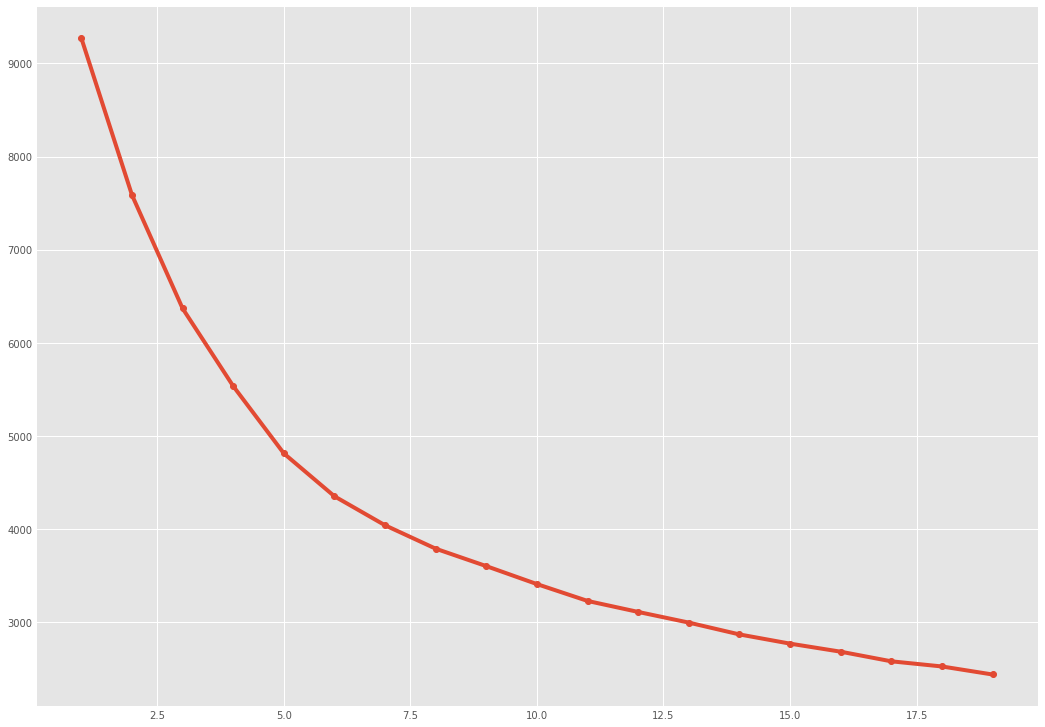

In [41]:
from matplotlib import cm
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

We don't see a sharp cut actually in the above plot. However, there is a slight cut at number 5. Let's check creating 5 clusters and see the distribution.

In [42]:
kmeans = KMeans(n_clusters=5, n_init = 5, random_state=100)
kmeans.fit(new_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [43]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[198 334 205 238  55]


In [44]:
# Adding the cluster created to scaled data set
predictions = kmeans.predict(new_df)
new_df["group"] = predictions
new_df['group'] = new_df['group'].astype('category')
new_df.dtypes

cement           float64
slag             float64
ash              float64
water            float64
superplastic     float64
coarseagg        float64
fineagg          float64
age              float64
strength         float64
group           category
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d95b93780>,
      dtype=object)

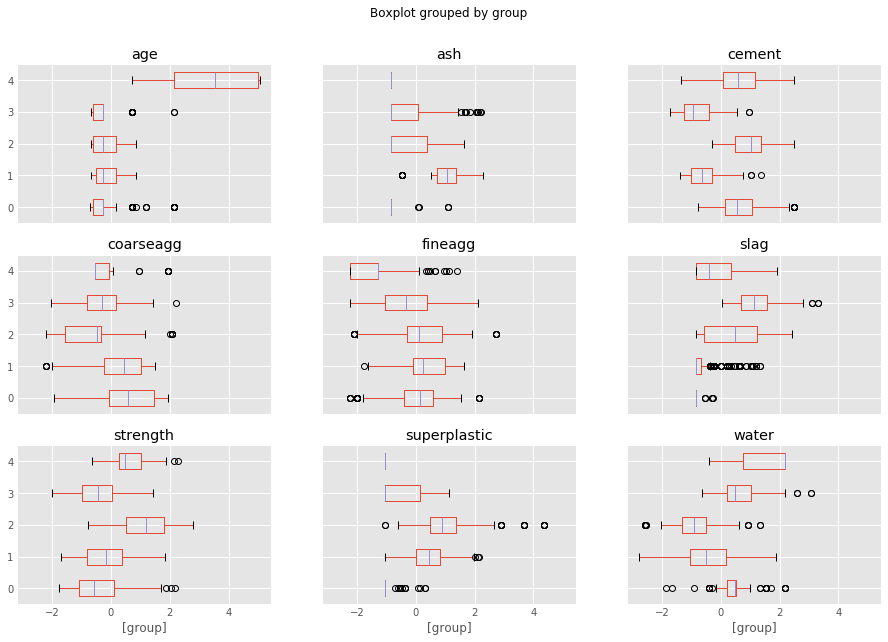

In [45]:
# Checking the distribution of the clsuters created to ensure cluster is done properly
new_df.boxplot(by = 'group',  layout=(3,3), figsize=(15, 10), vert = False)

All the data points are overlapped among the clusters. It is not possible to differentiate the data points to any of the clusters. It is very unlikey to apply different on various clusters.

# 6.3. Creating the Model

In [4]:
''' Splitting the dataset into training, validation & test sets. SInce the data points are limited, Lets's check 
the scores on training data first & then decide if we can freeze the model for tuning further & apply on test data.'''
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(concrete_df)
X = concrete_df.iloc[:, 0:8]
y = concrete_df.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=25)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=52)

In [47]:
from sklearn import model_selection
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import mean_squared_error

models = []
models.append(('LinReg', LinearRegression()))
models.append(('RidgeReg', Ridge()))
models.append(('LassoReg', Lasso()))
models.append(('KNNReg', KNeighborsRegressor()))
models.append(('DTReg', DecisionTreeRegressor()))
models.append(('RFReg', RandomForestRegressor()))
models.append(('GBReg', GradientBoostingRegressor()))
models.append(('ABReg', AdaBoostRegressor()))
models.append(('SVMReg', SVR()))

# evaluate each model in turn
results = []
names = []
scoring1 = make_scorer(r2_score)
scoring2 = make_scorer(mean_squared_error)
print("R2 Scores in 10-fold cross validation procedure")
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=25)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring1)
    cv_mse = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring2)
    results.append((cv_results))
    results.append((cv_mse))
    names.append(name)
    msg = "%s: %f (%f),(%f)" % (name, cv_results.mean(), cv_results.std(), cv_mse.mean())
    print(msg)

R2 Scores in 10-fold cross validation procedure
LinReg: 0.588873 (0.055884),(111.276220)
RidgeReg: 0.588874 (0.055884),(111.276182)
LassoReg: 0.588710 (0.055646),(111.313296)
KNNReg: 0.677607 (0.071518),(86.572968)
DTReg: 0.821307 (0.077504),(45.033908)
RFReg: 0.894033 (0.037270),(28.380993)
GBReg: 0.902399 (0.026895),(26.652707)
ABReg: 0.780389 (0.029085),(59.808948)
SVMReg: 0.004144 (0.025556),(274.258012)


1. In case of regression, the ideal model should have least mean square error & best r2_score (close to 1).
2. Based on the above k-fold validation across all the regression models, Gradient Boost Regressot gives the best r2_score & least mean squared error follwed by Random Forest Regressor & Decision Tree Regressor.
3. We can freeze Gradient Boosting, Random Forest & Decision Tree regressor models for further tuning.

# 6.4. Feature Importance

In [7]:
feature_cols = X_train.columns
GBR = GradientBoostingRegressor()
GBR.fit(X_train, y_train)
feat_importance = GBR.feature_importances_
feat_imp_dict = dict(zip(feature_cols, GBR.feature_importances_))
feat_imp_GBR = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp_GBR

,0
cement,0.322019
slag,0.063240
ash,0.019814
water,0.113572
superplastic,0.067330
coarseagg,0.020416
fineagg,0.042188
age,0.351421


In [8]:
feature_cols = X_train.columns
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
feat_importance = RFR.feature_importances_
feat_imp_dict = dict(zip(feature_cols, RFR.feature_importances_))
feat_imp_RFR = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp_RFR

,0
cement,0.329934
slag,0.079347
ash,0.017822
water,0.128392
superplastic,0.054684
coarseagg,0.034204
fineagg,0.031593
age,0.324023


In [9]:
feature_cols = X_train.columns
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)
feat_importance = DTR.feature_importances_
feat_imp_dict = dict(zip(feature_cols, DTR.feature_importances_))
feat_imp_DTR = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp_DTR

,0
cement,0.371493
slag,0.091208
ash,0.006435
water,0.131085
superplastic,0.021789
coarseagg,0.037989
fineagg,0.029688
age,0.310313


### Comparison of feature importance across 3 models selcted:

In [51]:
feature_imp_df = feat_imp_GBR.merge(feat_imp_RFR,left_index = True, right_index = True)
feature_imp_df = feature_imp_df.merge(feat_imp_DTR,left_index = True, right_index = True)
feature_imp_df.rename(columns = {'0_x':'GradientBoosting', '0_y':'RandomForest',0:'DecisionTree'}, inplace = True)
feature_imp_df

,GradientBoosting,RandomForest,DecisionTree
cement,0.321990,0.332119,0.377529
slag,0.063211,0.078862,0.090286
ash,0.019805,0.009495,0.007363
water,0.113694,0.105898,0.129316
superplastic,0.067278,0.068896,0.024377
coarseagg,0.020611,0.029167,0.037537
fineagg,0.041961,0.041879,0.023287
age,0.351450,0.333685,0.310305


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d955d0518>,
      dtype=object)

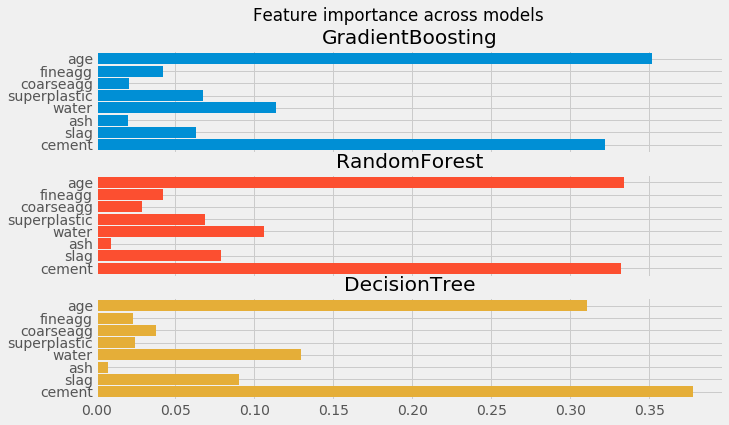

In [52]:
plt.style.use('fivethirtyeight')
feature_imp_df.plot(kind = 'barh',figsize = (10,6), subplots=True, width = 0.9,
                    title = 'Feature importance across models',legend = False)

### Observations:
1. Gradient boosting considers 'age' as the most important feature followed by 'cement', 'water', 'coarseagg' & 'slag'
2. However, other 2 models considers 'cement' as most important feature followed by 'age', 'water' & 'slag'
3. We can observe phenominal difference on how each model works
4. 'ash' is considered as least important in all the models
4. Let's tune these models & arrive at the best hyper parameters to freeze on the model selection

In [53]:
# Lets's check the models with default parameters
models

[('LinReg',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 ('RidgeReg', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001)),
 ('LassoReg', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='cyclic', tol=0.0001, warm_start=False)),
 ('KNNReg',
  KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform')),
 ('DTReg',
  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        preso

# 6.5. Tuning & finalizing the models

In [7]:
selected_models = {'GBReg': GradientBoostingRegressor(), 
                   'RFReg': RandomForestRegressor(), 
                   'DTReg': DecisionTreeRegressor()}

In [8]:
params = {'GBReg': {'learning_rate': [0.1, 0.05, 0.02, 0.01],'max_depth': list(range(2,9)),
                    'min_samples_leaf': list(range(5, 150, 15)), 'max_features': list(range(1,9))},
          'RFReg': {'max_depth': [2,3,4,None], 'n_estimators': [10, 30, 50, 100, 200, 400, 600, 800, 1000],
                    'max_features': list(range(1,9))},
          'DTReg': {'max_depth': [2,3,4,None], 'max_features': list(range(1,9)), 'min_samples_leaf':list(range(2,9))}}

In [56]:
params

{'DTReg': {'max_depth': [2, 3, 4, None],
  'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
  'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8]},
 'GBReg': {'learning_rate': [0.1, 0.05, 0.02, 0.01],
  'max_depth': [2, 3, 4, 5, 6, 7, 8],
  'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
  'min_samples_leaf': [5, 20, 35, 50, 65, 80, 95, 110, 125, 140]},
 'RFReg': {'max_depth': [2, 3, 4, None],
  'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
  'n_estimators': [10, 30, 50, 100, 200, 400, 600, 800, 1000]}}

In [0]:
grid1 = GridSearchCV(GradientBoostingRegressor(),{'learning_rate': [0.1, 0.05, 0.02, 0.01],'max_depth': list(range(2,9)),
                                                  'min_samples_leaf': list(range(5, 150, 15)), 'max_features': list(range(1,9))}, cv = 10)

In [58]:
grid1.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                             

In [59]:
grid1.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'max_features': 3,
 'min_samples_leaf': 5}

In [69]:
print(grid1.best_estimator_) 
print(grid1.best_score_)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=3, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
0.9269615568383746


In [0]:
grid2 = GridSearchCV(RandomForestRegressor(),{'max_depth': [2,3,4,None], 'n_estimators': [10, 30, 50, 100, 200, 400, 600, 800, 1000],'max_features': list(range(1,9))},cv = 10)

In [67]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, None],


In [68]:
grid2.best_params_

{'max_depth': None, 'max_features': 5, 'n_estimators': 400}

In [71]:
print(grid2.best_estimator_) 
print(grid2.best_score_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.9109543562349677


In [0]:
grid3 = GridSearchCV(DecisionTreeRegressor(),{'max_depth': [2,3,4,None], 'max_features': list(range(1,9)), 'min_samples_leaf':list(range(2,9))},cv=10)

In [74]:
grid3.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, None],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8]},
             pre_dis

In [75]:
grid3.best_params_

{'max_depth': None, 'max_features': 8, 'min_samples_leaf': 2}

In [76]:
print(grid3.best_estimator_) 
print(grid3.best_score_)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=8,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.8311505253750909


## Final Decision:

Among the three selected models, Gradient boosting regressor gave the best score of 92.69% with the best parameters ['learning_rate': 0.1, 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 5].

In [6]:
Final_Model = GradientBoostingRegressor(learning_rate=0.1, max_depth=7,
                                        max_features=3, min_samples_leaf=5, random_state = 12)

In [7]:
Final_Model.fit(X_train, y_train)
Final_Model.predict(X_test)
Final_Model.score(X_test, y_test)

0.92686402533164

## At the first instance of exposing the test data, we could see the score of 92.68% of accuracy. Model is neither over fir nor under fit as performance is consistent on training and also the test data.

# 6.6. Model Performance Range at 95% Confidence Level

In [5]:
n_iterations = 1000
n_size = int(len(X)*0.67)

In [6]:
n_size

690

In [7]:
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
stats1 = list()
stats2 = list()
for i in range(n_iterations):
    #preparing train & test sets
    train = resample(X.values, n_samples = n_size)
    test = np.array([X for X in X.values if X.tolist() not in train.tolist()])
    #specifying & fitting the model
    model = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, max_features=3, min_samples_leaf=5)
    model.fit(train[:,:-1],train[:,-1])
    #evaluating model
    predictions = model.predict(test[:,:-1])
    #score = model.score(test[:, -1], predictions)
    score1 = r2_score(test[:,-1], predictions)
    stats1.append(score1)
    score2 = mean_squared_error(test[:,-1], predictions)
    stats2.append(score2)

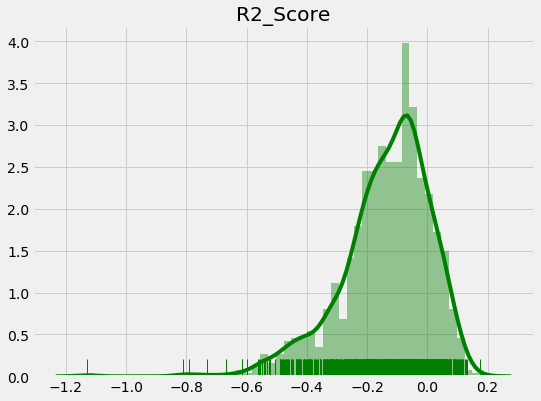

In [34]:
# plot scores
plt.figure(figsize=(8,6))
plt.style.use('fivethirtyeight')
plt.title('R2_Score')
sns.distplot(stats1, bins=50, rug = True, color = 'g')

In [51]:
n = len(stats1)
conf = 0.95
x_bar = np.mean(stats1) #average r2_score
std = np.std(stats1) # r2_score standard deviation
z_critical = stats.norm.ppf(q = 0.975) # 0.975 is arrived as (1-alpha(0.05)/2) as we need spread 0.5 on both the sides.
z_critical

1.959963984540054

In [35]:
z_interval = stats.norm.interval(alpha=conf)
z_interval #This is the interval for std covering 95% of samples

(-1.959963984540054, 1.959963984540054)

In [41]:
r2_std_error = std/np.sqrt(n)
r2_std_error

0.004709966019369781

In [42]:
R2_CI_lower = x_bar - z_critical * r2_std_error
R2_CI_upper = x_bar + z_critical * r2_std_error
R2_CI_lower,R2_CI_upper

(-0.14668408419465986, -0.12822135666191534)

## At 95% confidence, R2_Scores might range from -0.14668 (lower limit) to -0.12822 (upper limit). R2 Scores of the regression models close to zero are reliable. 

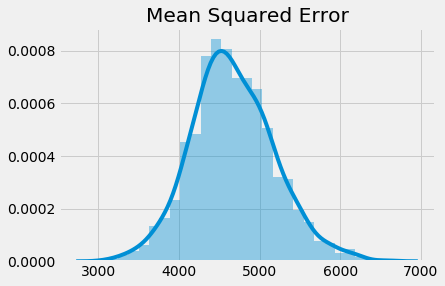

In [39]:
plt.title("Mean Squared Error")
sns.distplot(stats2)

In [50]:
np.mean(stats2) # average mean squared error

4666.570899481077

In [46]:
mse_std = np.std(stats2)
mse_std_error = mse_std/np.sqrt(n)
mse_std_error

16.240757615288437

In [48]:
mse_CI_lower = np.mean(stats2) - z_critical * mse_std_error
mse_CI_upper = np.mean(stats2) + z_critical * mse_std_error
mse_CI_lower, mse_CI_upper

(4634.739599473467, 4698.402199488686)

## At 95% confidence, mean squared errors might range from 4634.739 (lower limit) to 4698.402 (upper limit). 

## We can rely on models that generate lowest mean squared errors & highest r2_scores (closest to 1.)